In [66]:
import numpy as np
import matplotlib.pyplot as plt
from pyuvdata import UVData, UVCal, utils

In [44]:
oldpath = '/lustre/aoc/projects/hera/plaplant/HERA19Golden/RawData/2457548/'
newpath = '/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/RawData/2457548/'
stem = 'zen.2457548.45923'
rawfile = newpath+stem+'.uvcRP.uvh5'
calfits = oldpath+stem+'.HH.uvcRP.calfits'
#calfits 

In [45]:
uvd = UVData()
uvc = UVCal()

In [51]:
uvd.read(rawfile)
uvc.read_calfits(calfits)

divide by zero encountered in true_divide
invalid value encountered in true_divide
divide by zero encountered in true_divide
invalid value encountered in true_divide
divide by zero encountered in true_divide
invalid value encountered in true_divide
divide by zero encountered in true_divide
invalid value encountered in true_divide


(115, 185)

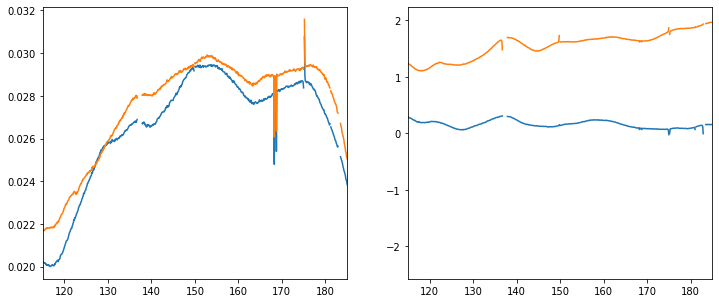

In [52]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(uvc.freq_array.squeeze()/1e6,np.abs(uvc.gain_array[1,0,:,0,0]/~uvc.flag_array[1,0,:,0,0]))
plt.plot(uvc.freq_array.squeeze()/1e6,np.abs(uvc.gain_array[1,0,:,0,1]/~uvc.flag_array[1,0,:,0,1]))
plt.xlim([115,185])
plt.subplot(1,2,2)
plt.plot(uvc.freq_array.squeeze()/1e6,np.angle(uvc.gain_array[1,0,:,0,0]/~uvc.flag_array[1,0,:,0,0]))
plt.plot(uvc.freq_array.squeeze()/1e6,np.angle(uvc.gain_array[1,0,:,0,1]/~uvc.flag_array[1,0,:,0,1]))
plt.xlim([115,185])

In [53]:
test_bls = [(88,64,'xx'), (97,10,'xx'), (20,31,'xx')]
test_uvd = uvd.select(bls=test_bls, inplace=False)

divide by zero encountered in true_divide
invalid value encountered in true_divide


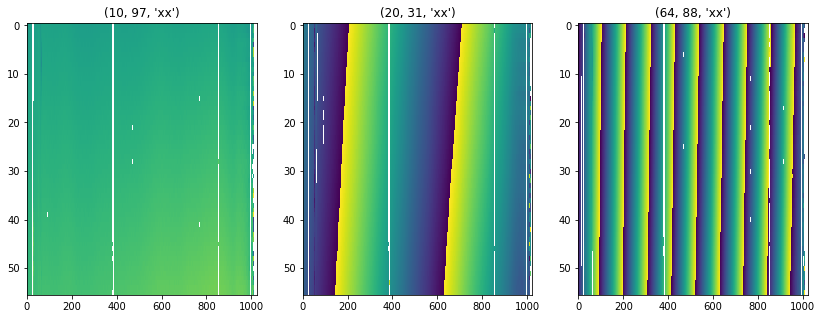

divide by zero encountered in true_divide
invalid value encountered in true_divide


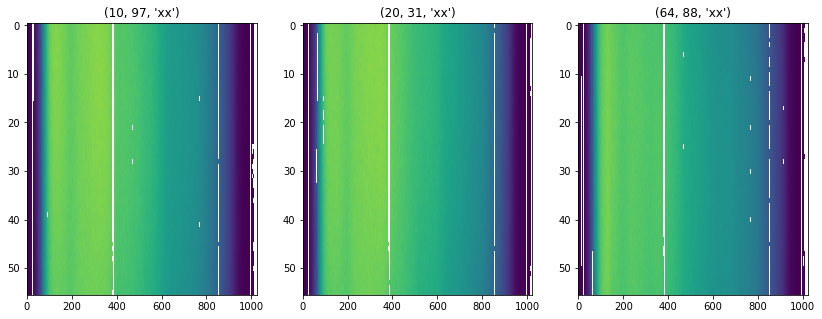

In [71]:
plt.figure(figsize=(14,5))
for i,app in enumerate(test_uvd.get_antpairpols()):
    plt.subplot(1,3,i+1)
    plt.title(app)
    plt.imshow(np.angle(test_uvd.get_data(app))/~test_uvd.get_flags(app),aspect='auto')
plt.show()
plt.figure(figsize=(14,5))
for i,app in enumerate(test_uvd.get_antpairpols()):
    plt.subplot(1,3,i+1)
    plt.title(app)
    plt.imshow(np.abs(test_uvd.get_data(app))/~test_uvd.get_flags(app),aspect='auto',vmin=0,vmax=10)
    #plt.colorbar()
plt.show()

In [75]:
utils.uvcalibrate?

In [67]:
uvd_calibrated = utils.uvcalibrate(uvd, uvc, inplace=False)

In [72]:
test_uvd_calibrated = uvd_calibrated.select(bls=test_bls, inplace=False)

divide by zero encountered in true_divide
invalid value encountered in true_divide


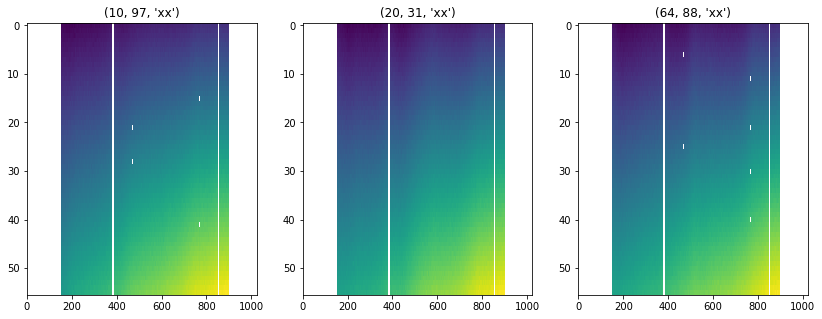

divide by zero encountered in true_divide
invalid value encountered in true_divide


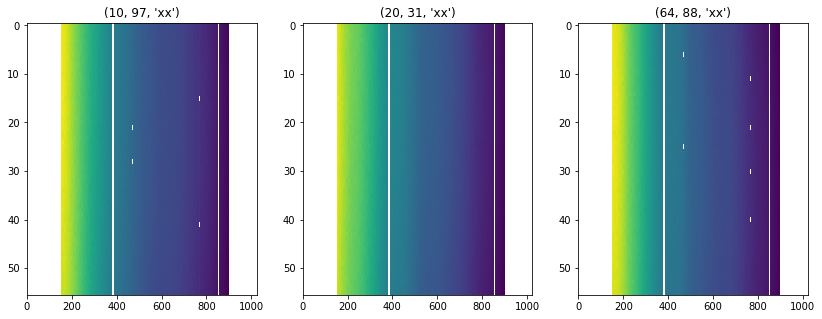

In [76]:
fix_conj = [False, True, False]
plt.figure(figsize=(14,5))
for i,app in enumerate(test_uvd_calibrated.get_antpairpols()):
    plt.subplot(1,3,i+1)
    plt.title(app)
    if fix_conj[i]:
        vis = np.conj(test_uvd_calibrated.get_data(app))
    else:
        vis = test_uvd_calibrated.get_data(app)
    plt.imshow(np.angle(vis)/~test_uvd_calibrated.get_flags(app),aspect='auto')
plt.show()
plt.figure(figsize=(14,5))
for i,app in enumerate(test_uvd_calibrated.get_antpairpols()):
    plt.subplot(1,3,i+1)
    plt.title(app)
    plt.imshow(np.abs(test_uvd_calibrated.get_data(app))/~test_uvd_calibrated.get_flags(app),aspect='auto')
    #plt.colorbar()
plt.show()